In [9]:
#Importing needed modules .
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
#Reading csv file and getting 10 sample of that randomly .
path = "D:\\datasets\\college_reviews\\collegereview2023.csv"
file = pd.read_csv(path,lineterminator='\n',index_col=0)
df = file.copy()
df.sample(10)

,Name,college,review,rating
962,Student (Anonymous),Dayananda Sagar Academy of Technology and Mana...,The jobs and placements are very nice because ...,9.8
757,Lakshay Bansal,National Institute of Technology - [NIT],The placement is very high and nice here. For ...,9.3
728,Mahesani Chakraborty,University of Engineering and Management - [UEM],I had opted for a degree outside kolkata for b...,7.3
2190,Anurag bharti,IIT Kharagpur - Indian Institute of Technology...,I don't know cause I am in first year. But I d...,9.2
1247,Shivam Singh,IIT BHU - Indian Institute of Technology,The campus life is great as there is a whole c...,8.7
2380,Subba Reddy pallerla,Aditya College Of Engineering and Technology -...,Through searching. The Colleges in top most. I...,8.7
1967,Faraaz Usmani,Pranveer Singh Institute of Technology - [PSIT],I took the UPSEE exam and secured a rank of ar...,7.8
2839,Rishik TS,National Institute of Technology - [NITK],Course curriculum varies from course to course...,9.7
2614,UDIT NARAYAN PANDEY,IIT Kanpur - Indian Institute of Technology - ...,IITK is well known for it's rigorous academic ...,9.5
3027,PURVESH MOHOD,Yeshwantrao Chavan College of Engineering - [Y...,I got admission on the basis of my MHTCET scor...,6.7


In [11]:
#Droping duplicated samples .
df = df.drop_duplicates()
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3339
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     3318 non-null   object 
 1   college  3318 non-null   object 
 2   review   3318 non-null   object 
 3   rating   3318 non-null   float64
dtypes: float64(1), object(3)
memory usage: 129.6+ KB


In [12]:
#Seperating labels .
label = df.rating

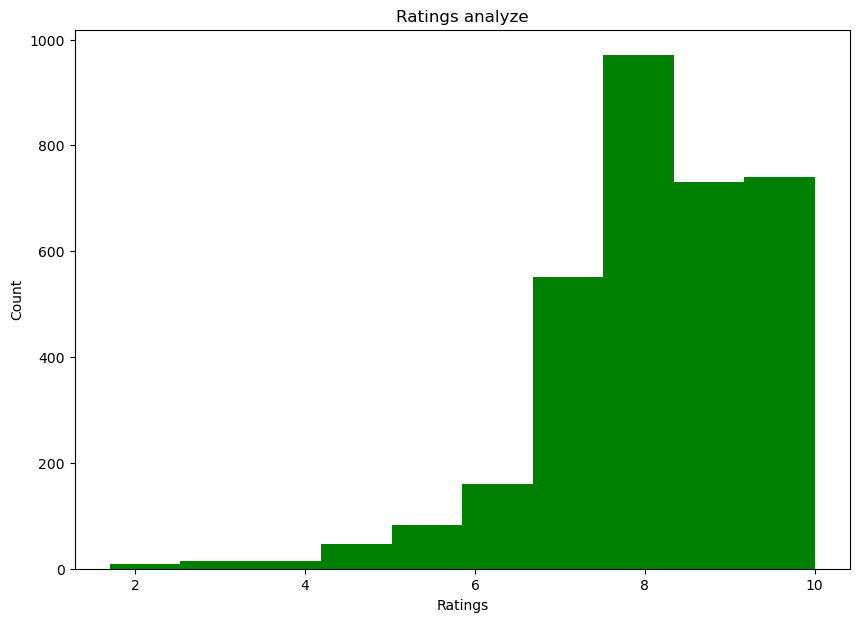

In [13]:
#Plotting a histogram of labels . 
plt.figure(figsize=(10,7))
plt.hist(label,color='green')
plt.title('Ratings analyze')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [15]:
#Seperating features .
features = [Filter(text) for text in df.review]

In [16]:
#Tokenizing reviews and creating a matrix from them .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(features)
sequnces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequnces,padding='post',truncating='post',maxlen=30)

In [26]:
#Seperating features and labels to train and valid .
train_x , valid_x , train_y , valid_y = train_test_split(matrix,label,test_size=0.3,random_state=42)

In [27]:
print(f'There are {len(train_x)} texts for train and {len(valid_x)} texts for valid')

There are 2322 texts for train and 996 texts for valid


In [28]:
#Defining a model by a function .
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,1,input_length=30),
                               layers.Flatten(),
                               layers.Dense(3,activation='relu'),
                              layers.Dense(1)])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [29]:
#datas train .
history = Create_model().fit(train_x,train_y,epochs = 20 , validation_data = (valid_x,valid_y))

Epoch 1/20
73/73 [==============================] - 1s 3ms/step - loss: 65.6102 - mae: 7.9996 - val_loss: 63.8177 - val_mae: 7.8921
Epoch 2/20
73/73 [==============================] - 0s 1ms/step - loss: 60.5316 - mae: 7.6745 - val_loss: 56.7016 - val_mae: 7.4276
Epoch 3/20
73/73 [==============================] - 0s 2ms/step - loss: 50.3316 - mae: 6.9737 - val_loss: 43.4847 - val_mae: 6.4764
Epoch 4/20
73/73 [==============================] - 0s 1ms/step - loss: 34.6025 - mae: 5.7223 - val_loss: 25.9062 - val_mae: 4.9292
Epoch 5/20
73/73 [==============================] - 0s 1ms/step - loss: 17.0619 - mae: 3.8802 - val_loss: 9.5270 - val_mae: 2.8249
Epoch 6/20
73/73 [==============================] - 0s 1ms/step - loss: 4.9877 - mae: 1.8869 - val_loss: 2.5371 - val_mae: 1.2761
Epoch 7/20
73/73 [==============================] - 0s 1ms/step - loss: 2.4468 - mae: 1.2306 - val_loss: 2.1931 - val_mae: 1.1795
Epoch 8/20
73/73 [==============================] - 0s 1ms/step - loss: 2.1625 - 

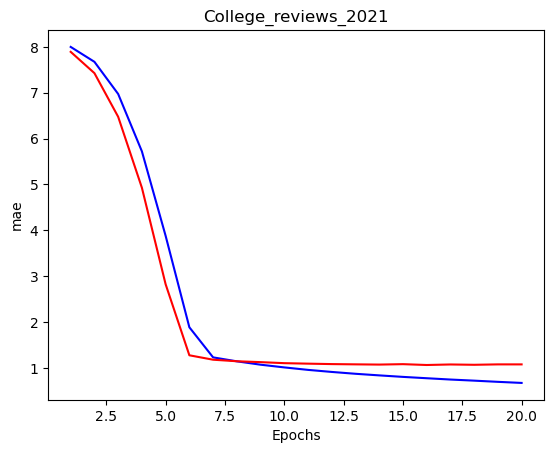

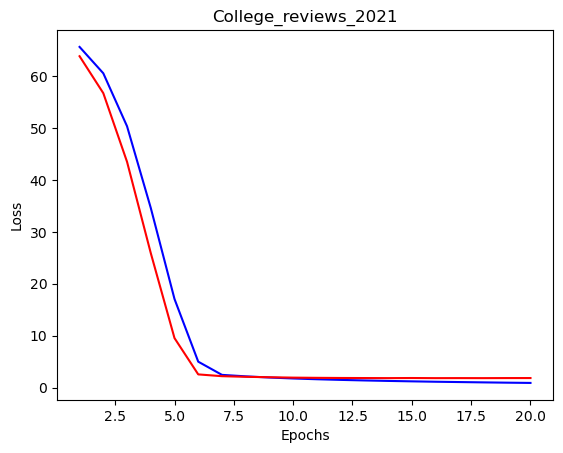

In [30]:
#Visualize models performance
epoch = range(1,21)
results = history.history
plt.plot(epoch,results['mae'],'blue')
plt.plot(epoch,results['val_mae'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('College_reviews_2021')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('College_reviews_2021')
plt.show()